   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.

<Figure size 1200x800 with 0 Axes>

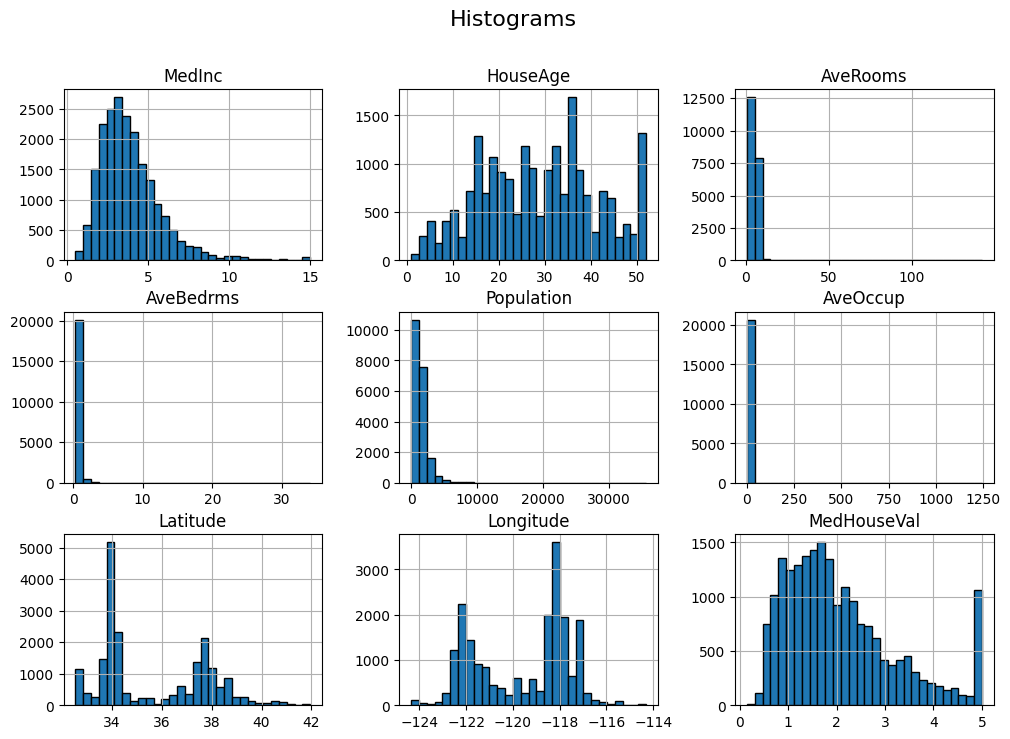

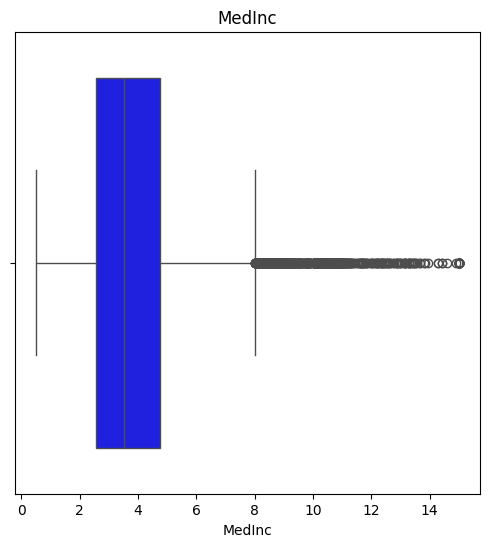

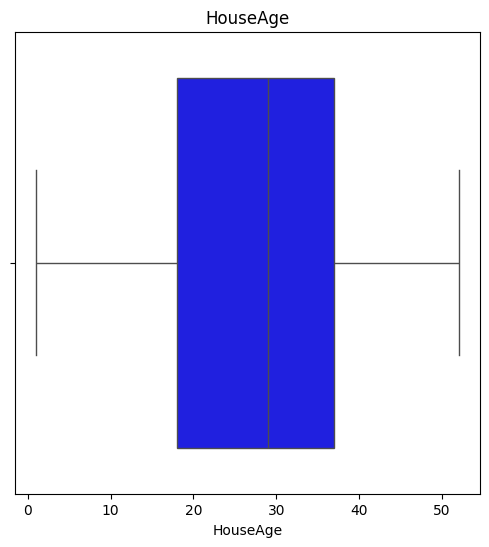

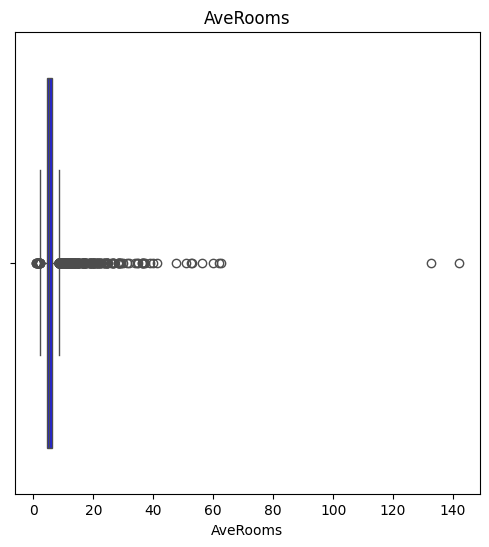

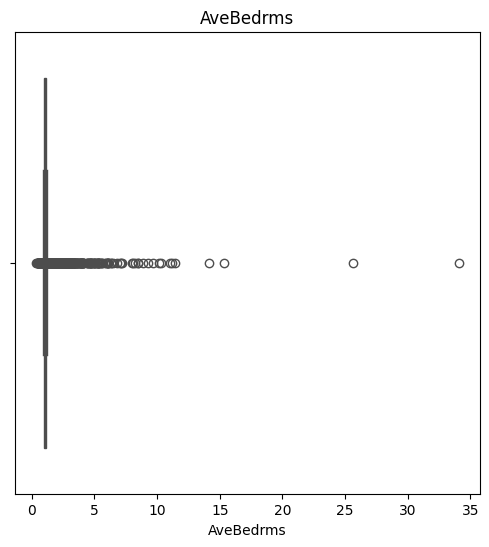

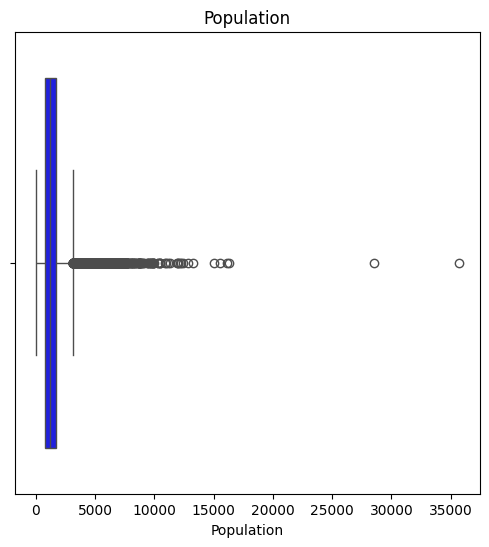

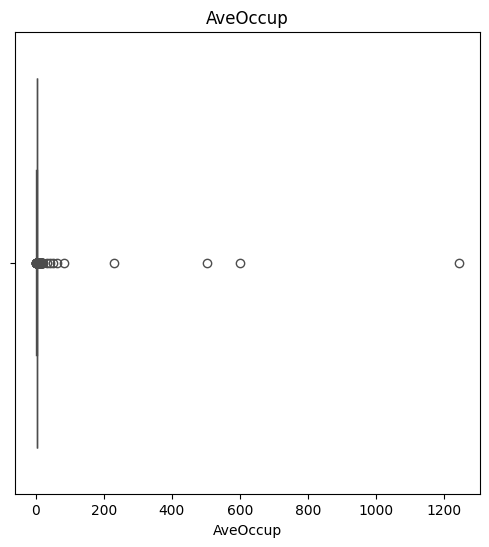

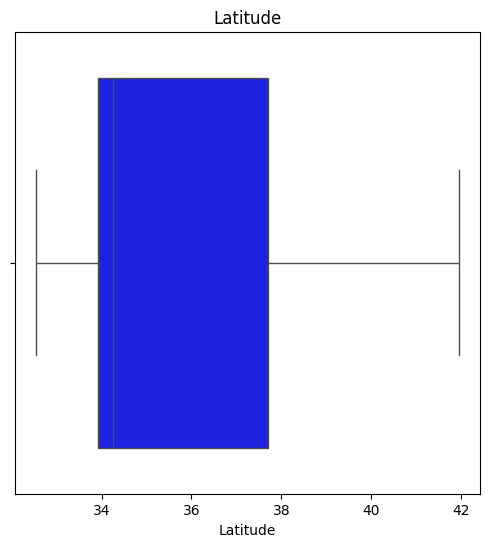

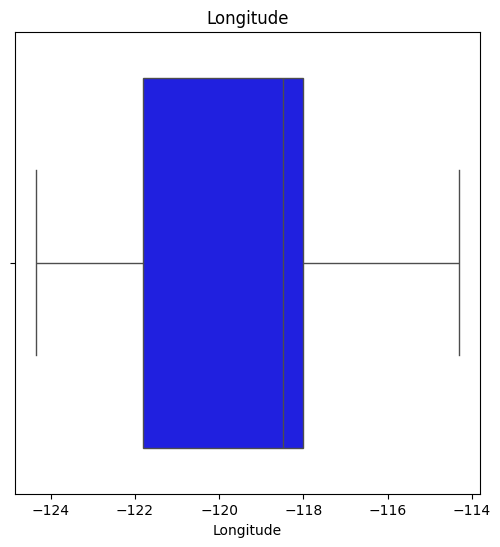

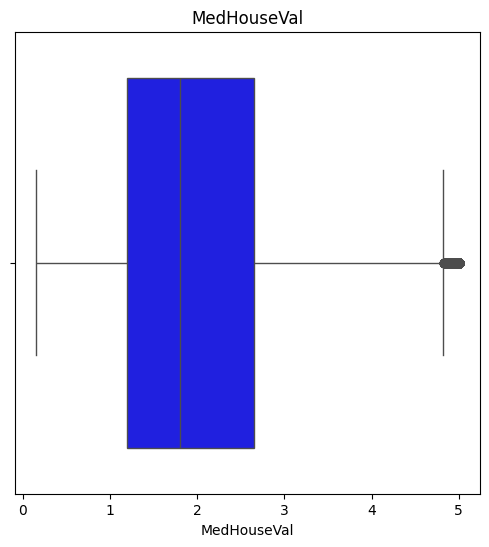

Outliers detection:
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing(as_frame=True)
df = housing_data.frame
print(df.head())
print("\nDataset Summary:")
print(df.describe())
print("\nBasic information about dataset:")
print(df.info())
print(df.shape)
print("\nMissing Values in each column:")
print(df.isnull().sum())
numerical_features = df.select_dtypes(include=[np.number]).columns
print(numerical_features)
plt.figure(figsize=(12, 8))
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histograms", fontsize=16)
plt.show()
for col in numerical_features:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=df[col], color='blue')
    plt.title(col)
    plt.xlabel(col)
    plt.show()
print("Outliers detection:")
outliers_summary = {}
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outliers_summary[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers")